In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # normalize training and test data
    x_train = x_train / 255
    x_test = x_test / 255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)

    digits = []
    targets = []
    for i in range(10):
        images = x_train[y_train == i]
        digits.append(images[np.random.choice(
            len(images), 1000, replace=False)])
        targets.append(np.full((1000,), i))

    x_train = np.vstack(digits)
    y_train = np.hstack(targets)

    # shuffle the data
    permutation = np.random.permutation(x_train.shape[0])
    x_train = x_train[permutation]
    y_train = y_train[permutation]

    test_indices = np.random.choice(x_test.shape[0], 1000)
    x_test = x_test[test_indices]
    y_test = y_test[test_indices]
    return (x_train, y_train), (x_test, y_test)

In [4]:
def LeastSquares(A, b, reg=1.0):
    return np.linalg.inv((A.T @ A) + reg * np.eye(A.shape[1])) @ (A.T @ b)


def confusion_matrix(y_true, y_pred, labels: List = []):
    """
    Computes the confusion matrix for a given set of labels.
    Args:
        y_true: The true labels.
        y_pred: The predicted labels.
        labels: The list of labels to consider.
    Returns:
        The confusion matrix. (np.ndarray)
    """
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(len(y_pred)):
        matrix[y_true[i], y_pred[i]] += 1
    return matrix

Accuracy : 0.84


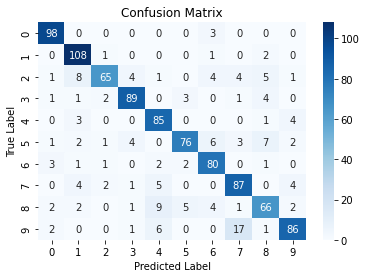

In [5]:

(x_train, y_train), (x_test, y_test) = load_data()
classifier = np.zeros((x_train.shape[1], 10))
for i in range(10):
    b = 2*(y_train == i) - 1
    classifier[:, i] = LeastSquares(x_train, b, reg=1.0)
y_pred = np.argmax(x_test @ classifier, axis=1).astype(int)
print(f"Accuracy : {np.mean(y_pred == y_test)}")

cnf_matrix = confusion_matrix(y_test, y_pred, labels=range(10))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()